**Importing Libraries**

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn


# Importing necessary libriaries
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE

**Importing Datasets**

In [2]:
train = pd.read_csv('/kaggle/input/duth-ir-2023-2024/train.csv')#, encoding= 'unicode_escape')
train = train.rename(columns={'H DEFENSIVE RREBOUNDS':'H DEFENSIVE REBOUNDS'})
train = train.rename(columns={'H TOTAL 3POINTS':'H TOTAL 3 POINTS'})
train = train.rename(columns={'H OVERITME 2':'H OVERTIME 2'})
train = train.rename(columns={'A MADE 3 POIMTS':'A MADE 3 POINTS'})
train = train.rename(columns={'A STEASL':'A STEALS'})
test = pd.read_csv('/kaggle/input/duth-ir-2023-2024/test.csv')#, encoding= 'unicode_escape')
test = test.rename(columns={'H DEFENSIVE RREBOUNDS':'H DEFENSIVE REBOUNDS'})
test = test.rename(columns={'H TOTAL 3POINTS':'H TOTAL 3 POINTS'})
test = test.rename(columns={'A MADE 3 POIMTS':'A MADE 3 POINTS'})
test = test.rename(columns={'A STEASL':'A STEALS'})
test = test.rename(columns={'H OVERITME 2':'H OVERTIME 2'})

In [3]:
train.head()

,Unnamed: 0,HTEAM,HOME TEAM,HOME WIN,HOME POINTS,H MADE 2 POINTS,H TOTAL 2 POINTS,H MADE 3 POINTS,H TOTAL 3 POINTS,H MADE 1 POINTS,...,A BLOCKS AGAINST,A FOULS COMMITED,A FOULS RECEIVED,A PIR,A Q1,A Q2,A Q3,A Q4,A OVERTIME 1,A OVERTIME 2
0,0,LUG,LUGANO SNAKES,1,75,25,47,6,16,7,...,0,20,24,82,18,19,15,22,0.0,0.0
1,1,PAF,PAF BOLOGNA,1,91,22,44,5,15,32,...,2,33,24,81,22,27,16,20,0.0,0.0
2,2,CBE,ADECCO ESTUDIANTES,1,86,20,36,8,22,22,...,1,22,22,95,23,29,14,25,0.0,0.0
3,3,CHA,CHARLEROI,1,80,27,41,6,25,8,...,1,21,0,34,19,20,15,14,0.0,0.0
4,4,AEK,AEK,1,78,21,35,6,16,18,...,1,30,25,61,15,21,19,22,0.0,0.0


In [4]:
test.head()

,Unnamed: 0,HTEAM,HOME TEAM,HOME WIN,HOME POINTS,H MADE 2 POINTS,H TOTAL 2 POINTS,H MADE 3 POINTS,H TOTAL 3 POINTS,H MADE 1 POINTS,...,A BLOCKS AGAINST,A FOULS COMMITED,A FOULS RECEIVED,A PIR,A Q1,A Q2,A Q3,A Q4,A OVERTIME 1,A OVERTIME 2
0,3667,MIL,ARMANI MILANO,1,70,20,39,6,20,12,...,5,22,28,92,36,20,22,-78,0.0,0.0
1,3668,BAS,BASKONIA,1,101,29,48,11,30,10,...,2,19,17,94,40,24,24,-88,0.0,0.0
2,3669,OLY,OLYMPIAKOS,1,71,17,39,10,26,7,...,3,17,17,61,21,19,22,-62,0.0,0.0
3,3670,BAR,BARCELONA,1,81,19,30,10,23,13,...,0,20,16,76,40,17,20,-77,0.0,0.0
4,3671,GAL,GALATASARIA,1,75,18,45,9,20,12,...,4,20,17,100,47,27,16,-90,0.0,0.0


**Strings to int for train**

In [5]:
encoder = LabelEncoder()

for i in range(0,train.shape[1]):
    train.iloc[:,i] = encoder.fit_transform(train.iloc[:,i])

**String to int for test**

In [6]:
for i in range (0,test.shape[1]):
    test.iloc[:,i] = encoder.fit_transform(test.iloc[:,i])

**The 5 plots**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


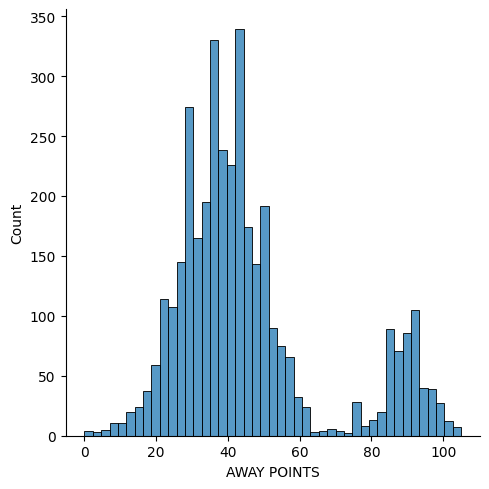

In [7]:
import seaborn as sns

sns.displot(train, x = 'AWAY POINTS')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


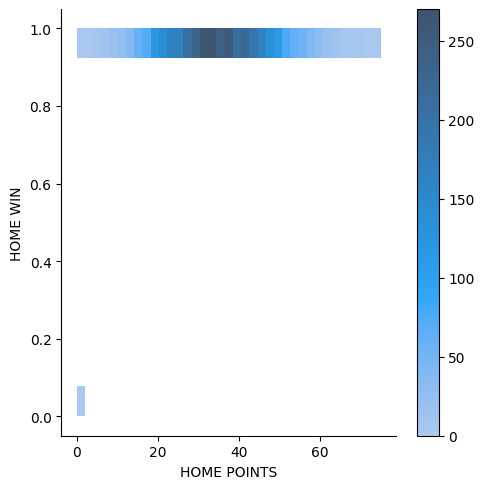

In [8]:
sns.displot(train,x='HOME POINTS', y = 'HOME WIN', cbar= True)

<Axes: xlabel='AWAY POINTS', ylabel='A MADE 3 POINTS'>

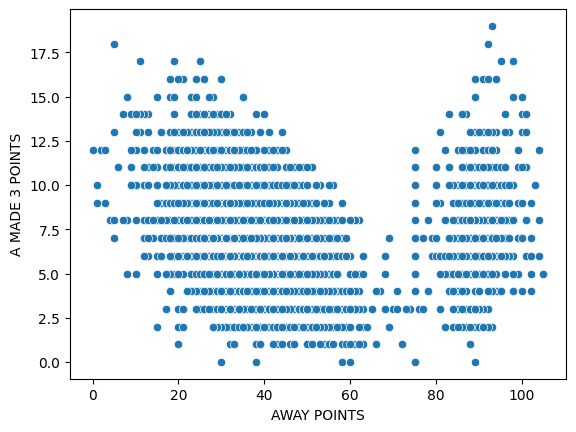

In [9]:
sns.scatterplot(x='AWAY POINTS', y = 'A MADE 3 POINTS', data=train)

<Axes: xlabel='H STEALS', ylabel='H FOULS COMMITED'>

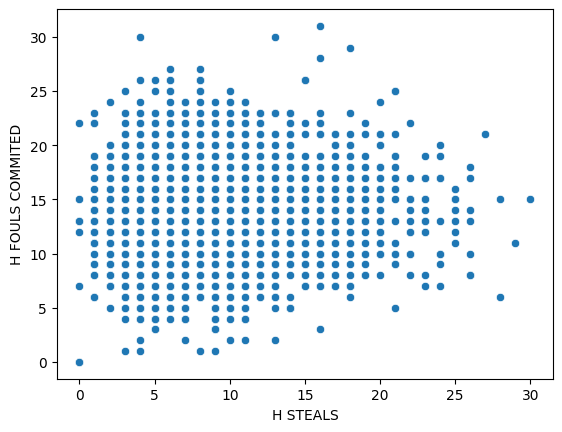

In [10]:
sns.scatterplot(x = 'H STEALS', y = 'H FOULS COMMITED', data = train)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


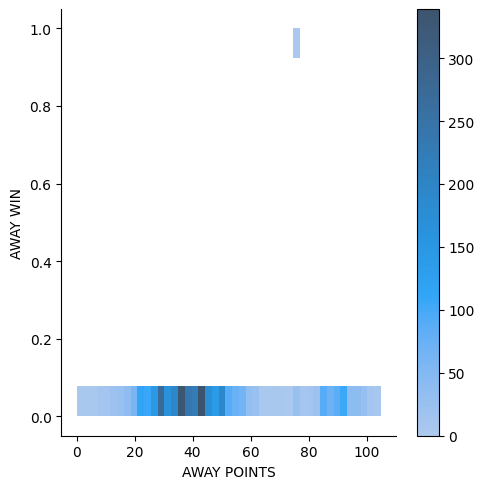

In [11]:
sns.displot(train,x='AWAY POINTS', y = 'AWAY WIN', cbar= True)

In [12]:
for i in range (0,len(train)):
    h_total_points = train.at[i,'H MADE 1 POINTS'] + 2*train.at[i,'H MADE 2 POINTS'] + 3*train.at[i,'H MADE 3 POINTS']
    if train.at[i,'HOME POINTS'] is not h_total_points:
        train.at[i,'HOME POINTS'] = h_total_points
    hq_points = train.at[i,'H Q1'] + train.at[i,'H Q2'] + train.at[i,'H Q3'] + train.at[i,'H Q4'] + train.at[i,'H OVERTIME 1'] + train.at[i,'H OVERTIME 2']
    if h_total_points is not hq_points:
        train.at[i,'H Q4'] = h_total_points - (train.at[i,'H Q1'] + train.at[i,'H Q2'] + train.at[i,'H Q3'] + train.at[i,'H OVERTIME 1'] + train.at[i,'H OVERTIME 2'])
    a_total_points = train.at[i,'A MADE 1 POINTS'] + 2*train.at[i,'A MADE 2 POINTS'] + 3*train.at[i,'A MADE 3 POINTS']
    if train.at[i,'AWAY POINTS'] is not a_total_points:
        train.at[i,'AWAY POINTS'] = a_total_points
    aq_points = train.at[i,'A Q1'] + train.at[i,'A Q2'] + train.at[i,'A Q3'] + train.at[i,'A Q4'] + train.at[i,'A OVERTIME 1'] + train.at[i,'A OVERTIME 2']
    if a_total_points is not aq_points:
        train.at[i,'A Q4'] = a_total_points - (train.at[i,'A Q1'] + train.at[i,'A Q2'] + train.at[i,'A Q3'] + train.at[i,'A OVERTIME 1'] + train.at[i,'A OVERTIME 2'])
    if h_total_points > a_total_points:
        train.at[i,'HOME WIN'] = 1
        train.at[i,'AWAY WIN'] = 0
    elif h_total_points < a_total_points:
        train.at[i,'HOME WIN'] = 0
        train.at[i,'AWAY WIN'] = 1
    else:
        train.at[i,'HOME WIN'] = 0
        train.at[i,'AWAY WIN'] = 0

for i in range (0,len(test)):
    h_total_points = test.at[i,'H MADE 1 POINTS'] + 2*test.at[i,'H MADE 2 POINTS'] + 3*test.at[i,'H MADE 3 POINTS']
    if test.at[i,'HOME POINTS'] is not h_total_points:
        test.at[i,'HOME POINTS'] = h_total_points
    hq_points = test.at[i,'H Q1'] + test.at[i,'H Q2'] + test.at[i,'H Q3'] + test.at[i,'H Q4'] + test.at[i,'H OVERTIME 1'] + test.at[i,'H OVERTIME 2']
    if h_total_points is not hq_points:
        test.at[i,'H Q4'] = h_total_points - (test.at[i,'H Q1'] + test.at[i,'H Q2'] + test.at[i,'H Q3'] + test.at[i,'H OVERTIME 1'] +  test.at[i,'H OVERTIME 2'])
    a_total_points = test.at[i,'A MADE 1 POINTS'] + 2*test.at[i,'A MADE 2 POINTS'] + 3*test.at[i,'A MADE 3 POINTS']
    if test.at[i,'AWAY POINTS'] is not a_total_points:
        test.at[i,'AWAY POINTS'] = a_total_points
    aq_points = train.at[i,'A Q1'] + test.at[i,'A Q2'] + test.at[i,'A Q3'] + test.at[i,'A Q4'] + test.at[i,'A OVERTIME 1'] + test.at[i,'A OVERTIME 2']
    if a_total_points is not aq_points:
        test.at[i,'A Q4'] = a_total_points - (test.at[i,'A Q1'] + test.at[i,'A Q2'] + test.at[i,'A Q3'] + test.at[i,'A OVERTIME 1'] + test.at[i,'A OVERTIME 2'])
    if h_total_points > a_total_points:
        test.at[i,'HOME WIN'] = 1
        test.at[i,'AWAY WIN'] = 0
    elif h_total_points < a_total_points:
        test.at[i,'HOME WIN'] = 0
        test.at[i,'AWAY WIN'] = 1
    else:
        test.at[i,'HOME WIN'] = 0
        test.at[i,'AWAY WIN'] = 0
        
        
train.dropna(how='any',axis=1,inplace=True)
test.dropna(how='any',axis=1,inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


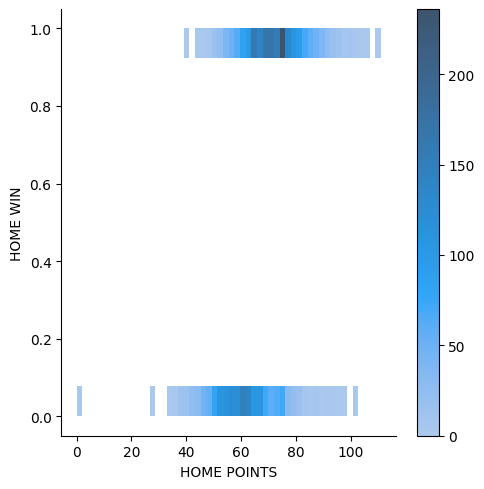

In [13]:
sns.displot(train,x='HOME POINTS', y = 'HOME WIN', cbar= True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


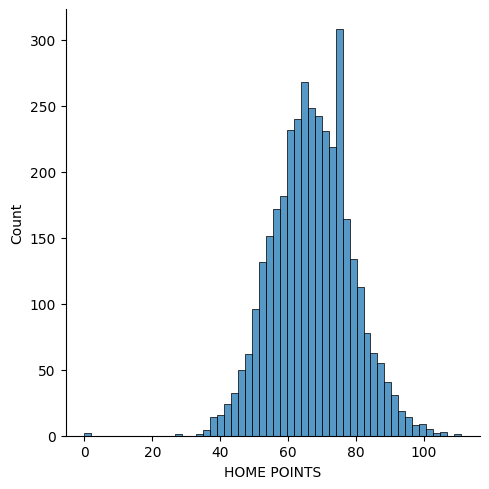

In [14]:
sns.displot(train,x='HOME POINTS')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


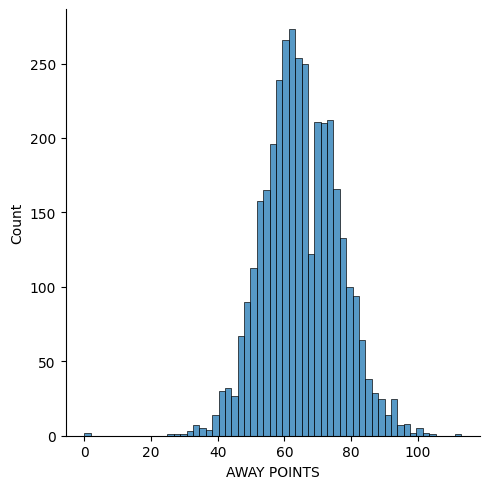

In [15]:
sns.displot(train,x='AWAY POINTS')

<Axes: xlabel='AWAY POINTS', ylabel='A MADE 3 POINTS'>

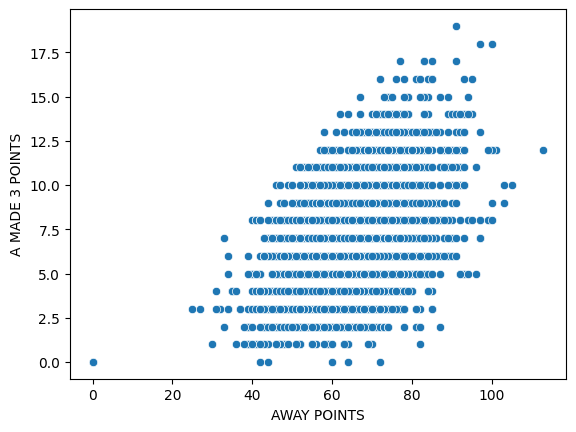

In [16]:
sns.scatterplot(x='AWAY POINTS', y = 'A MADE 3 POINTS', data=train)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


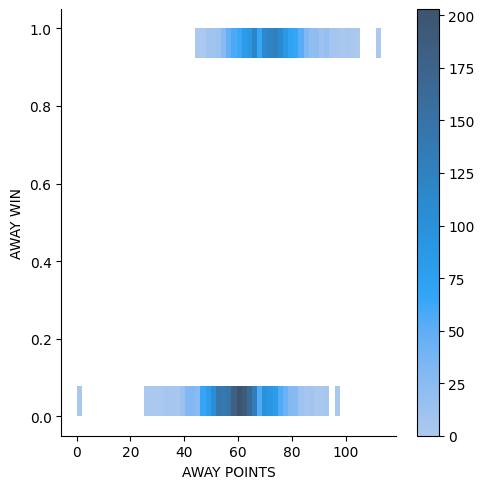

In [17]:
sns.displot(train,x='AWAY POINTS', y = 'AWAY WIN', cbar= True)

**Data split**

In [18]:
X_train = train.drop(['HOME WIN','AWAY WIN'], axis=1)
X_test = test.drop(['HOME WIN','AWAY WIN'], axis=1)

print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))


y_train = train["HOME WIN"]
y_test = test["HOME WIN"]
print("Shape of new dataframes - {} , {}".format(y_train.shape, y_test.shape))


Shape of new dataframes - (3667, 53) , (917, 53)
Shape of new dataframes - (3667,) , (917,)


**Model preparation**

In [19]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
svc = SVC()
grid_search = RandomizedSearchCV(svc, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.9s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   1.0s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END .....................C=1, gamma=0.1, kernel=sigmoid; total time=   0.5s
[CV] END .................C=100, gamma=0.001, kernel=sigmoid; total time=   0.5s
[CV] END .................C=100, gamma=0.001, ke

**Model fit**

In [20]:
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X_train, y_train)

X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


f_model = model.fit(X_train_rfe, y_train.values.ravel())
prediction = model.predict(X_test_rfe)
prediction_train = model.predict(X_train_rfe)

**F1 score**

In [21]:
print("Score f1 train set:",round(f1_score(prediction_train,y_train),4))

print("Score f1 test set:",round(f1_score(prediction,y_test),4))

Score f1 train set: 1.0
Score f1 test set: 1.0


**Create submission**

In [22]:
sample_submission = pd.read_csv('/kaggle/input/duth-ir-2023-2024/sample_submission.csv')
sample_submission.head()


sub_df = pd.DataFrame({"ID":sample_submission["ID"].values})
sub_df["HOME WIN"] = prediction
sub_df["HOME WIN"] = sub_df["HOME WIN"].apply(lambda x: 1 if x>1 else 0 if x<0 else x)
sub_df.to_csv("submission_benchmark.csv", index=False)